**Parnian Taghupour**
9713010

---



---



importing libraries

In [210]:
!pip install contractions

In [211]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import chi2,SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
#!pip install nlpaug.augmenter.word as naw 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


this function use a text file to make a dictionary of each formal and informal representation of the word.

In [212]:
def lex_norm():
    norm_dict = {}
    with open(r"emnlp_dict.txt") as f:
        for line in f:
            (key, val) = line.split()
            norm_dict[key] = val
    return norm_dict

use the previous function to formalize words

In [213]:
def formalize(words):
    """
    informal language normalization a list of tokenized words
    """
#     print("informal language normalization a list of tokenized words")
    lexical_norm=lex_norm()
    formalized_words=[lexical_norm[word] if word in lexical_norm else word for word in words]
    
    return formalized_words

In [214]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

this function do all the preprosesing:
deleting urls 

*   removing urls
*   normalizing
*   remove punctuation
*   augmenting

*   ect.







In [215]:
# d=replace_contractions(d)
                      
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r"(?:\@|RT @|https?\://)\S+", "", tweet)
    tweet=replace_contractions(tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words and len(w)>=3]
    # filtered_words = [w for w in filtered_words if len(w)>=3]
    filtered_words = formalize(filtered_words)
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

augmenting

In [ ]:
def augment_text(dataframe):
    '''
    function used to augment minor classes in tweets dataset
    '''
    augmented_df = pd.DataFrame(columns=['text', 'airline_sentiment'])
    augmentor=naw.WordNetAug(aug_p=0.5)
    aug_sent={'neutral':3,
             'positive':4}
    for i in range(len(dataframe)):
        current_label=dataframe['airline_sentiment'].iloc[i]
        if current_label in list(aug_sent.keys()):
            current_text=dataframe['text'].iloc[i]
            for j in range(aug_sent[current_label]):
                text = augmentor.augment(current_text)
                label = current_label
                tempdf = pd.DataFrame(list(zip([text], [label])), columns=['text', 'airline_sentiment'])
                augmented_df = augmented_df.append(tempdf)
        else :
                text = dataframe['text'].iloc[i]
                label = current_label
                tempdf = pd.DataFrame(list(zip([text], [label])), columns=['text', 'airline_sentiment'])
                augmented_df = augmented_df.append(tempdf)
    return augmented_df


opening data files:

In [40]:
from google.colab import files
uploaded = files.upload()
import io
train_data = pd.read_csv(io.BytesIO(uploaded['airline-train.csv']))

Saving airline-train.csv to airline-train (1).csv


In [74]:
from google.colab import files
uploaded = files.upload()
import io
validation_data = pd.read_csv(io.BytesIO(uploaded['airline-dev.csv']))

Saving airline-dev.csv to airline-dev (2).csv


In [73]:
from google.colab import files
uploaded = files.upload()
import io
test_data = pd.read_csv(io.BytesIO(uploaded['airline-test.csv']))

Saving airline-test.csv to airline-test (1).csv


changing datas attributes to numbers.

some work to know data better and become familiar with it.

In [237]:
print("Shape of the dataframe is",train_data.shape)
print("The number of nulls in each column are \n", train_data.isna().sum())

Shape of the dataframe is (8784, 22)
The number of nulls in each column are 
 Unnamed: 0                         0
_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 38
airline_sentiment                  0
airline_sentiment:confidence       0
negativereason                  3237
negativereason:confidence       2476
airline                            0
airline_sentiment_gold          8758
name                               0
negativereason_gold             8761
retweet_count                      0
text                               0
tweet_coord                     8148
tweet_created                      0
tweet_id                           0
tweet_location                  2859
user_timezone                   2869
target                             0
dtype: int64


In [216]:
train_data['target'] = train_data['airline_sentiment'].map({'positive':1,'neutral':0,'negative':-1})
validation_data['target'] = validation_data['airline_sentiment'].map({'positive':1,'neutral':0,'negative':-1})
test_data['target'] = test_data['airline_sentiment'].map({'positive':1,'neutral':0,'negative':-1})
train_data.head()



,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,target
0,11429,681462729,False,finalized,3,2/25/15 3:07,positive,1.0,NaN,NaN,US Airways,NaN,CaraModisett,NaN,0,also appreci hashtag lucycat,NaN,2/18/15 10:55,5.681220e+17,"Memphis, Tennessee",Central Time (US & Canada),1
1,9717,681461003,False,finalized,3,2/25/15 3:20,negative,1.0,Can't Tell,0.3464,US Airways,NaN,LarrySandeen,NaN,0,discov bill reschedul flight cost second day l...,"[0.0, 0.0]",2/22/15 19:24,5.696990e+17,Southeastern Pennsylvania USA,NaN,-1
2,10153,681461443,False,finalized,3,2/25/15 6:20,negative,1.0,Can't Tell,1.0000,US Airways,NaN,burseka,NaN,0,guy suck,NaN,2/22/15 7:28,5.695190e+17,NaN,NaN,-1
3,975,681449647,False,finalized,3,2/25/15 2:14,negative,1.0,Can't Tell,1.0000,United,NaN,artistanxiety,NaN,0,right angri,NaN,2/23/15 14:09,5.699820e+17,Punk is the preacher.,Arizona,-1
4,1511,681450373,False,finalized,3,2/25/15 6:57,negative,1.0,Can't Tell,0.6848,United,NaN,axelrodaj,NaN,0,sure peopl row paid premium seat use overhead ...,"[33.94077727, -118.39921036]",2/22/15 18:50,5.696910e+17,San Francisco,Pacific Time (US & Canada),-1


applying preprocessing on the data

In [217]:
train_data['text']=train_data['text'].apply(preprocess)
# train_data=augment_text(train_data)  

In [218]:
validation_data['text']=validation_data['text'].apply(preprocess)
#validation_data=augment_text(validation_data)  

In [219]:
test_data['text']=test_data['text'].apply(preprocess)
# test_data=augment_text(test_data)  

In [220]:
print(train_data['text'][:10])

0                         also appreci hashtag lucycat
1    discov bill reschedul flight cost second day l...
2                                             guy suck
3                                          right angri
4    sure peopl row paid premium seat use overhead ...
5    cancel flight flight way rebook websit applic ...
6                                   need help miss bag
7    say bag deliv local number say open ask main c...
8    start daili ber flight newark frankfurt replac...
9        think problem newark saturday due expect snow
Name: text, dtype: object


In [221]:
x_train=train_data['text']
y_train=train_data['target']

In [222]:
x_validation = validation_data['text']
y_validation = validation_data['target']

**Data vectorization**

Many machine learning models can only be trained on numerical input in the form of vectors or matrices. To prepare our tweets for the machine learning models we create a term frequency-inverse document frequency (tf-idf) vectorization. The result of this vectorization is a sparse matrix which contains a convenient representation of our tweets.

The machine learning will learn which word frequency is important to predict a correct sentiment.

ps:in finding the best parameters, I also give the TfidfVectorizer the paramenter ngram, but the overall result was better without it.

In [223]:
tvec = TfidfVectorizer(min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
x_train_tfidf = tvec.fit_transform(x_train)
x_validation_tfidf = tvec.transform(x_validation)

I use MultinominalNB because the implimentation was incremental means that I could further in the program add data into my model. In order to do so, we should use partial_fit instead of normal fit.
I use the function chi 2 from sklearn for feature extracting as the question said, and find out that as the features are more, the result is better.

In [224]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
ch2_result = []
for n in np.arange(100,1300,100):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    mnb = MultinomialNB()
    mnb.partial_fit(x_train_chi2_selected, y_train, classes=np.unique(y_train))
    score = mnb.score(x_validation_chi2_selected, y_validation)
    ch2_result.append(score)
    print ("chi2 feature selection evaluation calculated for"+ str(n) +"features"+ str(score))

chi2 feature selection evaluation calculated for100features0.6775956284153005
chi2 feature selection evaluation calculated for200features0.6933060109289617
chi2 feature selection evaluation calculated for300features0.703551912568306
chi2 feature selection evaluation calculated for400features0.7134562841530054
chi2 feature selection evaluation calculated for500features0.7158469945355191
chi2 feature selection evaluation calculated for600features0.717896174863388
chi2 feature selection evaluation calculated for700features0.7209699453551912
chi2 feature selection evaluation calculated for800features0.7219945355191257
chi2 feature selection evaluation calculated for900features0.7223360655737705
chi2 feature selection evaluation calculated for1000features0.7216530054644809
chi2 feature selection evaluation calculated for1100features0.7185792349726776
chi2 feature selection evaluation calculated for1200features0.7233606557377049


train base on best result

In [230]:
ch2 = SelectKBest(chi2, k=1200)
x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
mnb.partial_fit(x_train_chi2_selected, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [231]:
x_validation_tfidf = tvec.transform(x_validation)
x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
accuracy = mnb.score(x_validation_chi2_selected, y_validation)
print(accuracy)

0.7278005464480874


In [ ]:
after cheching huper parameters, I can give my validation data to my model for learning.

In [232]:
mnb.partial_fit(x_validation_chi2_selected, y_validation)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

now working with test data.

In [193]:
x_test = test_data['text']
y_test = test_data['target']

labeling data and finding accuracy then modeling the resulits.

In [ ]:
x_test_tfidf = tvec.transform(x_test)
x_test_chi2_selected = ch2.transform(x_test_tfidf)
accuracy = mnb.score(x_test_chi2_selected, y_test)
print(accuracy)

calculating recall, f1-score, precisios, and confusion matrix to check our results.

In [195]:
from sklearn.metrics import classification_report
mnb_predictions = mnb.predict(x_test_chi2_selected)
print(classification_report(y_test, mnb_predictions))

              precision    recall  f1-score   support

          -1       0.74      0.97      0.84      1826
           0       0.69      0.27      0.39       636
           1       0.85      0.47      0.61       466

    accuracy                           0.74      2928
   macro avg       0.76      0.57      0.61      2928
weighted avg       0.74      0.74      0.70      2928



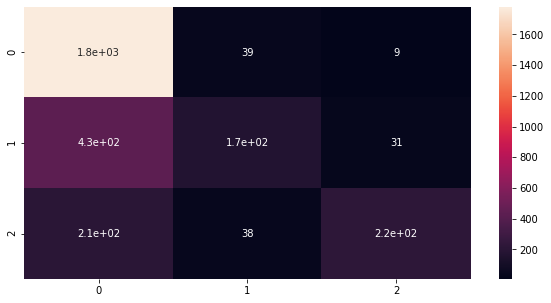

In [196]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, mnb_predictions)
plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True)
plt.show()

get inputs and then add wath we learnes to our model.

In [206]:
while True:
    text = input("enter tweets text (or exit to finish): ")
    if text == "exit":
        break
    sentiment = input("enter tweets sentiment ")
    X_test = ch2.transform(tvec.transform(pd.core.series.Series(text)))
    y_test = pd.core.series.Series(sentiment)
    mnb_predictions = mnb.predict(X_test)
    mnb.partial_fit(X_test, y_test)
    print( mnb_predictions)

enter tweets text (or exit to finish): great
enter tweets sentiment +1
[1]
enter tweets text (or exit to finish): bad
enter tweets sentiment -1
[-1]
enter tweets text (or exit to finish): exit


# **KNN** **TEST**

In [ ]:
all above steps for knn.

In [161]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no of neighbors is hpyer parameter
text_classifier2.fit(x_train_chi2_selected, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [162]:
predictions2 = text_classifier2.predict(x_test_chi2_selected)

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))

[[ 689 1106   31]
 [ 176  410   50]
 [  85  214  167]]
              precision    recall  f1-score   support

          -1       0.73      0.38      0.50      1826
           0       0.24      0.64      0.35       636
           1       0.67      0.36      0.47       466

    accuracy                           0.43      2928
   macro avg       0.55      0.46      0.44      2928
weighted avg       0.61      0.43      0.46      2928

0.4323770491803279
